<h1 style="color:#880808; text-align : center">Département Génie Informatique, FST de tanger, cycle ingénieur LSI/S4 2020-2021
Module "Apprentissage automatique"</h1>
<h2 style=" text-align: center; color: #AA4A44">Mini-projet Partie 1</h2>


<div class="title-box" style="display:flex;justify-content: space-around">
    <div class="left-box" style="margin-left: 10%;">
        <h3 style="color:#CC5500;">Encadré par : </h3>
        <ul><li><h4>M.AIT KBIR</h4></li></ul>
    </div>
    <div class="right-box" style="margin-left:40%;">
        <h3 style="color:#CC5500">Réalisé par : </h3>
        <ul>
            <li><h4>AKKAR Ferdaous</h4></li>
            <li><h4>BOUJELLABA Aymane</h4></li>
        </ul>
    </div>
</div>



<h3 style=" color : #FF3131">Objectif :</h3>
<p>
    Développement d'une application pour implémenter les solutions apportées par les modèles
de réseaux de neurones artificiels au problème de prédiction du mouvement des prix dans l'indice <strong>S&P 500</strong>, à partir des valeurs
    antérieures de l’indice. Le <strong>S&P 500</strong> est un indice boursier basé sur 500 grandes sociétés cotées
sur les bourses américaines. L'indice est possédé et géré par <strong>Standard & Poor's</strong>, l'une des trois
principales sociétés de notation financière du marché boursier américain.
</p>

<h3 style=" color : #FF3131">Partie 1 : L'utilisation des données </h3>

<h4 style="color:#702963">Les bibliothèque utilisé : </h4>

<ul>
    <li>
    Instalation des packages :
    </li>
</ul>

In [140]:
%%capture
!python -m pip install pandas_datareader

<ul>
    <li>
    Les librairies utilisé :
    </li>
</ul>

In [141]:
#importation des packages
import pandas as pd 
import numpy as np 
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import random

from datetime import datetime

# importation de sklearn 
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.metrics import explained_variance_score,  r2_score

<h4 style="color:#702963">Les donéées utilisé : </h4>

<p>Le télèchargement des données ce passe avec la fonctions <strong style="color:#702963">DataReader()</strong> : il est une large catégorie d'objets utilisés pour lire séquentiellement des données à partir d'une source de données : <p/> 
<ol>
    <li>
    Le symbole boursier à rechercher <strong style="color:#702963">'^GSPC'</strong>.
    </li>
    <li>
    Le site web <strong style="color:#702963">'yahoo'</strong>.
    </li>
    <li>
    Le début et la fin des informations
    </li>
</ol>


In [142]:
# importer les données
#la date de debut
d_start = datetime(2000, 1, 1)
#la date de fin
d_end = datetime(2010, 1, 1)
sp500_data = pdr.DataReader('^GSPC', 'yahoo', d_start, d_end)

# Verifier les 5 premiers lignes du données
sp500_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971


<ul>
    <li>
        Création et lecture de fichier csv:
    </li>
</ul>

In [143]:
#enregistre les données dans un fichier csv 
sp500_data.to_csv(r'sp500_data.csv', index = True)
#lecture de fichier csv 
df= pd.read_csv(r'sp500_data.csv', index_col='Date', parse_dates=True)

<ul>
    <li>
        Affichage de quelle données pour vérification:
    </li>
</ul>

In [144]:
#verifications de données
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971


<h4 style="color:#702963">Visualisation des données : </h4>
<ul>
    <li>
        Les graphes correspondent à notre données:
    </li>
</ul>

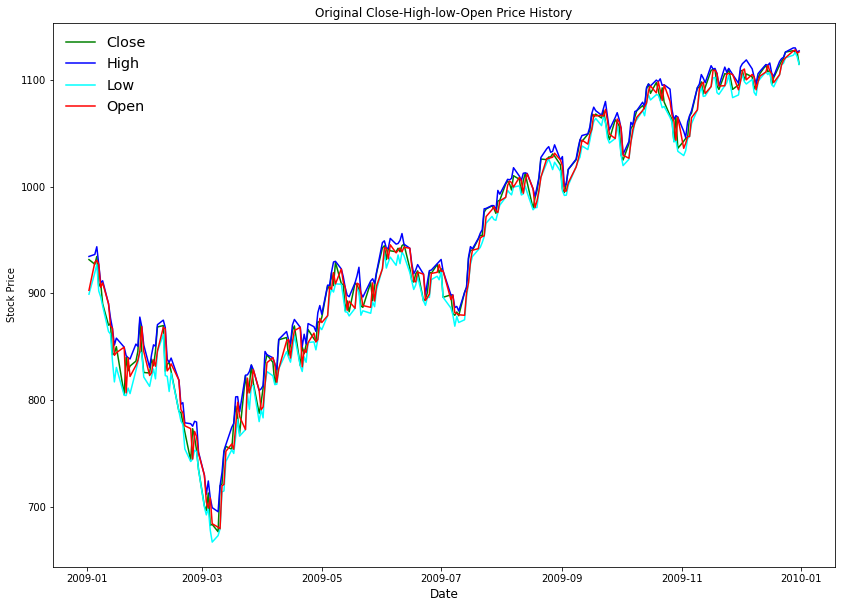

In [145]:
#++++++++++++++++++++++++++++++++++++++++++++Affichage de données originale++++++++++++++++++++++++++++++++++++++++
f, ax = plt.subplots(figsize=(14,10))

# First Subplot:"Close Price History"
ax.plot(sp500_data.index[int(sp500_data.shape[0]*0.9):], sp500_data["Close"][int(sp500_data.shape[0]*0.9):], color="green",label='Close')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Stock Price")
ax.set_title("Original Close-High-low-Open Price History")

# Second Subplot:"High Price History"
ax.plot(sp500_data.index[int(sp500_data.shape[0]*0.9):], sp500_data["High"][int(sp500_data.shape[0]*0.9):], color="blue",label='High')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Stock Price")

# Third Subplot:Low Price History"
ax.plot(sp500_data.index[int(sp500_data.shape[0]*0.9):], sp500_data["Low"][int(sp500_data.shape[0]*0.9):], color="cyan",label='Low')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Stock Price")

# Forth Subplot:Open Price History"
ax.plot(sp500_data.index[int(sp500_data.shape[0]*0.9):], sp500_data["Open"][int(sp500_data.shape[0]*0.9):], color="red",label='Open')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Stock Price")

ax.legend(loc='upper left', frameon=False, fontsize='x-large')

<h3 style=" color : #FF3131">Partie 2 : Préparation des données </h3>

<h4 style="color:#702963">Préparation des données : </h4>

<ul>
    <li>
        L'utilisation des données sous forme d'un tableau:
    </li>
</ul>

In [146]:
# Convertir data frame en liste
df = df.values

# affichage
df

array([[1.47800000e+03, 1.43835999e+03, 1.46925000e+03, 1.45521997e+03,
        9.31800000e+08, 1.45521997e+03],
       [1.45521997e+03, 1.39743005e+03, 1.45521997e+03, 1.39942004e+03,
        1.00900000e+09, 1.39942004e+03],
       [1.41327002e+03, 1.37768005e+03, 1.39942004e+03, 1.40210999e+03,
        1.08550000e+09, 1.40210999e+03],
       ...,
       [1.13038000e+03, 1.12607996e+03, 1.12855005e+03, 1.12619995e+03,
        2.49102000e+09, 1.12619995e+03],
       [1.12642004e+03, 1.12193994e+03, 1.12553003e+03, 1.12642004e+03,
        2.27730000e+09, 1.12642004e+03],
       [1.12764001e+03, 1.11481006e+03, 1.12659998e+03, 1.11509998e+03,
        2.07699000e+09, 1.11509998e+03]])

<ul>
    <li>
        Division de données en test et entraînement avec une copie pour la visualisation:
    </li>
</ul>

In [147]:
# 80% for training data
train = np.array(df[:int(df.shape[0]*0.8)])

# 20% for testing the data
test = np.array(df[int(df.shape[0]*0.8):])
test_Copy = test

<h4 style="color:#702963">Normalisation : </h4>


<ul>
    <li>
        <span style="color:#702963">MinMaxScaler</span> Transformez les entités en adaptant chaque entité à une plage donnée.  La plage choisi est entre 0 et 1 :
    </li>
</ul>

In [148]:
MinMaxscaler = MinMaxScaler(feature_range=(0,1))
train = MinMaxscaler.fit_transform(train)
test = MinMaxscaler.transform(test)

<ul>
    <li>
       Pour avoir les données des 9 derniers jours avant de prédire le 10éme jour, cela avec tous les colonnes de notre base de données. La fonction renvoi le tableau de x jours et y dernier jour. 
    </li>
</ul>


In [149]:
def split_xy(df):
    x = []
    y = []
    for i in range(9, df.shape[0]):
        x.append(df[i-9:i, 0:])
        y.append(df[i, 0:])
    x = np.array(x)
    y = np.array(y)
    return x,y

<ul>
    <li>
       Maintenant en créer les données de test et entrainement : 
    </li>
</ul>

In [150]:
#séparation des données d'entrainement et de test en x et y, x étant un groupe de 9 jours et y le 10ème jours
x_train, y_train = split_xy(train)
x_test, y_test = split_xy(test)

In [151]:
#affichage de leurs taille
print(x_train.shape)
print(y_train.shape)

(2003, 9, 6)
(2003, 6)


<ul>
    <li>
       on fait une autre creation pour la base test: 
    </li>
</ul>

In [152]:
x_testCopy, y_testCopy = split_xy(test_Copy)

<ul>
    <li>
       puisque on a 9 jours et 6 parametre il faut redimensionner x_train et x_test: 
    </li>
</ul>

In [153]:
#Transformer les listes de 3D en 2D
n,m,l = x_train.shape
x_train.shape = (n , m*l)

n,m,l = x_test.shape
x_test.shape = (n, m*l)

In [154]:
#vérifications des tailles
print("x_test : ", x_test.shape)
print("x_train : ", x_train.shape)
print("y_test : ",y_test.shape)
print("y_train : ",y_train.shape)

x_test :  (494, 54)
x_train :  (2003, 54)
y_test :  (494, 6)
y_train :  (2003, 6)


<h3 style=" color : #FF3131">Partie 3 : Traitement et modele </h3>

<h4 style="color:#702963">Introduction : </h4>

<strong style = "color: #6E260E">Définition :</strong> Le perceptron multicouche <strong>(PMC)</strong> est un type de réseau neuronal artificiel organisé en plusieurs couches au sein desquelles une information circule de la couche d'entrée vers la couche de sortie uniquement; il s'agit donc d'un réseau à propagation directe (feedforward). Chaque couche est constituée d'un nombre variable de neurones, les neurones de la dernière couche (dite « de sortie ») étant les sorties du système global.

<h4 style="color:#702963">Le modele : </h4>

In [155]:
class MultiLayerPerceptron:
    
    def __init__(self, arch , alpha = 0.1):
        # poids + biais
        self.W = {}
        self.B = {}
        
        # Taux d'adaptation
        self.alpha = alpha
        
        # Architecture :nbre de couches et nombre de neurones par couche
        self.arch = arch
        
        # Initialisation des poids: valeurs issues d'une distribution normale
        for i in np.arange(1,len(self.arch)):
            # Poids
            w = np.random.randn(self.arch[i], self.arch[i-1])
            self.W[i] = w/np.sqrt(self.arch[i])
            # Bias
            b = np.random.randn(self.arch[i],1)
            self.B[i] = b/np.sqrt(self.arch[i])            
            
    def sigmoid(self, x):
        return 1.0/(1 + np.exp(-x))
    
    def dsigmoid(self, x): # x correspond ici à sigmoid(uj(t)), voir le cours
        return x * (1 - x)
    
     # Calcul et mémorisation de l'état de tous les neurones du réseau 
    def forward_pass(self, x):
        a = np.atleast_2d(x).T
        
        stats = {}
        stats[0] = a
        for layer in np.arange(1, len(self.arch)):
            a = self.sigmoid(np.dot(self.W[layer], a) + self.B[layer])
            stats[layer] = a
        return stats    
    
    # Sortie du réseau associée à une entrée X (les états des autres neurones ne sont pas mémorisés)
    def predict(self, X):
        a = np.atleast_2d(X).T
        for layer in np.arange(1, len(self.arch)):
            a = self.sigmoid(np.dot(self.W[layer], a) + self.B[layer])
        return a
    
    # Calcul de l'erreur quadratique moyenne
    def quadratic_loss(self, X, Y):
        Y = np.atleast_2d(Y).T
        predictions = self.predict(X)
        n = X.shape[0]
        loss = (1/n) * 0.5 * np.sum((predictions - Y) ** 2) 
        return loss 
    
    # Calcul des gradients locaux 
    def compute_gradient(self, x, y):
     
        L = len(self.arch) - 1 # indice de la couche de sortie 
        # Gradients
        Gw = {}
        Gb = {}
        A = self.forward_pass(x)
        # Les vecteurs delta  
        D = {}
        y = np.atleast_2d(y).T
        deltaL = (A[L] - y) * self.dsigmoid(A[L])
        D[L] = deltaL # Pour la sortie 
        
        # Calculer les vecteurs delta des autres couches en utilisants les vecteurs delta de la couche suivante
        for l in np.arange(L-1, 0, -1):
            D[l] = (self.W[l+1].T.dot(D[l+1])) * self.dsigmoid(A[l])
        for l in np.arange(L, 0, -1):
            Gb[l] = D[l]
            Gw[l] = D[l].dot(A[l-1].T)        
       
        return (Gw, Gb)
    
    # Mise à jour par rapport à l'erreur moyenne (relative à un bloc d'exemples)
    def update_with_bloc(self, bloc):
      
        m = len(bloc)
        # Gradients locaux
        GCw = {}
        GCb = {}
        # Initialiser à zeros 
        for i in np.arange(1,len(self.arch)):
            GCw[i] = np.zeros(self.W[i].shape)
            GCb[i] = np.zeros(self.B[i].shape)
            
        # Calcul des gradients
        for x, y in bloc:
            Gw, Gb = self.compute_gradient(x, y)
            for i in np.arange(1,len(self.arch)): 
                GCw[i] += Gw[i]
                GCb[i] += Gb[i]
                
        # Mettre à jour les poids 
        for l in np.arange(1,len(self.arch)):
            self.W[l] = self.W[l] - (self.alpha/m)*(GCw[l])
            self.B[l] = self.B[l] - (self.alpha/m)*(GCb[l])
    
    # Iteration: entrainement en utilisant tous les exemples, un bloc de taille bloc_size chaque fois
    def train(self, D, bloc_size):
        train_size = len(D)
        np.random.shuffle(D) # tirage au sort
        blocs = [D[k : k + bloc_size] # Bloc d'exemples
            for k in range(0, train_size, bloc_size)]
        
        for bloc in blocs: # Mise à jour suite au passage de chaque bloc
            self.update_with_bloc(bloc)
  
    # Apprentissage
    def fit(self, X, Y, bloc_size = 20, iterations = 10000, error_min = 0.001, displayPeriod = 5000):
     
        # Exemples avec X et Y Assemblés
        D = list(zip(X,Y))
        
        # Erreurs
        errors = [self.quadratic_loss(X,Y)]   # Erreur initiale    
        
        iter = 0
        print("Itération: {}-{}, Erreur: {:.6f}".format(iter, iterations,errors[iter]))
        while iter < iterations and errors[iter] > error_min: # Tour de boucle 
            
            self.train(D, bloc_size)  # Mettre à jour 
            errors.append(self.quadratic_loss(X,Y))         # Nouvelle erreur
          
            if (iter+1) % displayPeriod == 0:
                print("Itération: {}-{}, Error: {:.6f}".format(iter + 1, iterations,errors[iter]))
            iter += 1
        
        if errors[iter] < error_min: # Erreur inférieur à la valeur minimale
            print("Fin: erreur minimale atteinte : {:.6f}.", errors[iter])
        elif iter == iterations:
            print("Fin: nombre maximum d'itérations atteint.")
       
        return (errors, iter)

<h4 style="color:#702963">Entrainement : </h4>

<ul>
    <li>
       Entrainement de données en utilisant 1000 itérations et l'affichage d'erreur : 
    </li>
</ul>

In [156]:
#entrainer le reseau PMC avec 54 neurone d'entrer et deux couches intermédiaires de taille 15 et 6 neurones de sortie 
pmc = MultiLayerPerceptron(arch=[x_train.shape[1], 15, 15, 6], alpha=0.1)
(errs, iter_fin) = pmc.fit(x_train, y_train, iterations=1000, bloc_size=5, error_min=0.00001, displayPeriod=200)

Itération: 0-1000, Erreur: 0.230550
Itération: 200-1000, Error: 0.003234
Itération: 400-1000, Error: 0.002153
Itération: 600-1000, Error: 0.001906
Itération: 800-1000, Error: 0.001786
Itération: 1000-1000, Error: 0.001698
Fin: nombre maximum d'itérations atteint.


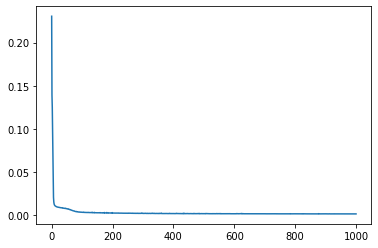

In [157]:
#affichage d'erreur
iters = np.arange(0, iter_fin + 1)
plt.plot(iters, errs)
plt.show()

<h4 style="color:#702963">La prédiction : </h4> 

<ul>
    <li>
       On prépare notre x et y : 
    </li>
</ul>

In [158]:
x_testCopy, y_testCopy = split_xy(test_Copy)

shapeX = x_testCopy.shape

In [159]:
#rechape x_testCopy du 3D en 2D
x_testCopy.shape = (shapeX[0], shapeX[1] * shapeX[2])

# Convertir de x test et y test en dataframe 
x_testCopy = pd.DataFrame(x_testCopy)
y_testCopy = pd.DataFrame(y_testCopy)

In [160]:
#pour avoir l'indice du début des index de test
print(x_testCopy.index)

RangeIndex(start=0, stop=494, step=1)


In [161]:
l = sp500_data.index.shape
# Add Date index
x_testCopy.index = sp500_data.index[l[0] - shapeX[0]:]
y_testCopy.index = sp500_data.index[l[0] - shapeX[0]:]

In [162]:
y_testCopy

,0,1,2,3,4,5
Date,,,,,,
2008-01-17,1377.719971,1330.670044,1374.790039,1333.250000,5.303130e+09,1333.250000
2008-01-18,1350.280029,1312.510010,1333.900024,1325.189941,6.004840e+09,1325.189941
2008-01-22,1322.089966,1274.290039,1312.939941,1310.500000,6.544690e+09,1310.500000
2008-01-23,1339.089966,1270.050049,1310.410034,1338.599976,3.241680e+09,1338.599976
2008-01-24,1355.150024,1334.310059,1340.130005,1352.069946,5.735300e+09,1352.069946
...,...,...,...,...,...,...
2009-12-24,1126.479980,1121.079956,1121.079956,1126.479980,1.267710e+09,1126.479980
2009-12-28,1130.380005,1123.510010,1127.530029,1127.780029,2.716400e+09,1127.780029
2009-12-29,1130.380005,1126.079956,1128.550049,1126.199951,2.491020e+09,1126.199951


<ul>
    <li>
       On donne une date à pédire : 
    </li>
</ul>

In [163]:
# Test pour un exemple 
testy = y_testCopy.loc['2008-04-29']
testx = x_testCopy.loc['2008-04-29']

x_testArray = testx.values

<ul>
    <li>
       Normaliser l'exemple : 
    </li>
</ul>

In [164]:
# 9 days 6 params
x_testArray.shape = (9,6)

#scaling
x_testArray = MinMaxscaler.transform(x_testArray)

#display shape
x_testArray.shape

print(x_testArray)

[[0.72914579 0.72237973 0.71079144 0.74576027 0.63451228 0.74576027]
 [0.73314557 0.74809047 0.74422117 0.74683854 0.54569876 0.74683854]
 [0.76825636 0.76302382 0.75136385 0.77825687 0.62833829 0.77825687]
 [0.76096408 0.77605077 0.77511353 0.77551722 0.49803112 0.77551722]
 [0.75607696 0.76409135 0.77347703 0.76000447 0.56325377 0.76000447]
 [0.75792888 0.76714159 0.76328948 0.76506555 0.60903623 0.76506555]
 [0.77059701 0.76568    0.76597908 0.77634156 0.66722518 0.77634156]
 [0.77238472 0.77697852 0.77531656 0.78778263 0.57450802 0.78778263]
 [0.77725912 0.79530528 0.78810481 0.7859181  0.52832902 0.7859181 ]]


<ul>
    <li>
       Execution de la prédiction : 
    </li>
</ul>

In [165]:
print('Les valeurs réelles : \n'+str(testy.values))
x_testArray.shape = (1,9*6)
print(x_testArray)
y_predicted = pmc.predict(x_testArray)
y_predicted = MinMaxscaler.inverse_transform(y_predicted.T)
print('\n Sortie prédite : \n'+str(y_predicted)+')' )


Les valeurs réelles : 
[1.39700000e+03 1.38669995e+03 1.39560999e+03 1.39093994e+03
 3.81532000e+09 1.39093994e+03]
[[0.72914579 0.72237973 0.71079144 0.74576027 0.63451228 0.74576027
  0.73314557 0.74809047 0.74422117 0.74683854 0.54569876 0.74683854
  0.76825636 0.76302382 0.75136385 0.77825687 0.62833829 0.77825687
  0.76096408 0.77605077 0.77511353 0.77551722 0.49803112 0.77551722
  0.75607696 0.76409135 0.77347703 0.76000447 0.56325377 0.76000447
  0.75792888 0.76714159 0.76328948 0.76506555 0.60903623 0.76506555
  0.77059701 0.76568    0.76597908 0.77634156 0.66722518 0.77634156
  0.77238472 0.77697852 0.77531656 0.78778263 0.57450802 0.78778263
  0.77725912 0.79530528 0.78810481 0.7859181  0.52832902 0.7859181 ]]

 Sortie prédite : 
[[1.42218677e+03 1.40698523e+03 1.41256103e+03 1.41589472e+03
  3.58051610e+09 1.41383460e+03]])


<h4 style="color:#702963">Evaluation de resultat : </h4> 

In [166]:

#predict all values of x_test
predictions = pmc.predict(x_test)

print ("\n Explained_variance_score :")
print(explained_variance_score(y_test, predictions.T))

print ("\n R2_score :")
print(r2_score(y_test, predictions.T))


 Explained_variance_score :
0.8597544066356456

 R2_score :
0.7289412618038642


<h3 style=" color : #FF3131">Partie 3 : Visualisation de résultat </h3>

In [167]:
n,m= sp500_data.shape

idxTest = int(n - (n*0.8) - 9)

idxTest = n - idxTest
print(idxTest)

2021


In [168]:
predictions = pmc.predict(x_test)
# Inverse scaler
predictions = predictions.T
predictions = MinMaxscaler.inverse_transform(predictions)
# Convert prediction array to dataframe
df_Result = pd.DataFrame(predictions, columns=['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'])
# Add last 20% (test_data) of initial dataframe index as an index for the result dataframe
df_Result.index = sp500_data.index[idxTest:]

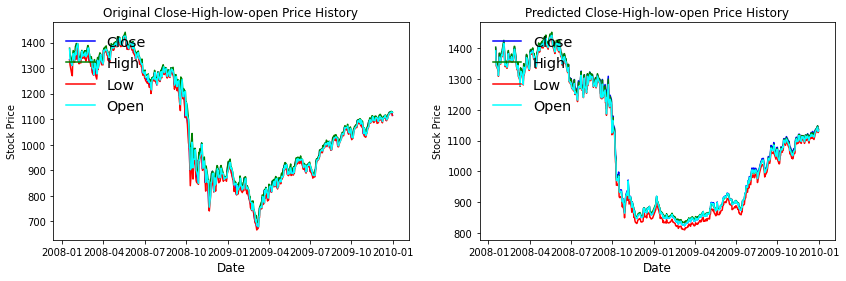

In [169]:
#++++++++++++++++++++++++++++++++++++++++affichage de données originale et prédire +++++++++++++++++++++++++++++++++++++++++++++

g, (bx1, bx2) = plt.subplots(1,2, figsize=(14,4))

#-----------------------------------------OriginaL----------------------------------
# First Subplot:"Close Price History"
bx1.plot(sp500_data.index[idxTest:], sp500_data["Close"][idxTest:], color="blue", label='Close')
bx1.set_xlabel("Date", fontsize=12)
bx1.set_ylabel("Stock Price")
bx1.set_title("Original Close-High-low-open Price History")

# Second Subplot:"High Price History"
bx1.plot(sp500_data.index[idxTest:], sp500_data["High"][idxTest:], color="green", label='High')
bx1.set_xlabel("Date", fontsize=12)
bx1.set_ylabel("Stock Price")

# Third Subplot:Low Price History"
bx1.plot(sp500_data.index[idxTest:], sp500_data["Low"][idxTest:], color="red", label='Low')
bx1.set_xlabel("Date", fontsize=12)
bx1.set_ylabel("Stock Price")

# Forth Subplot:Open Price History"
bx1.plot(sp500_data.index[idxTest:], sp500_data["Open"][idxTest:], color="cyan", label='Open')
bx1.set_xlabel("Date", fontsize=12)
bx1.set_ylabel("Stock Price")
bx1.legend(loc='upper left', frameon=False, fontsize='x-large')

#-----------------------------------------Predicted----------------------------------
# First Subplot:"Close Price History"
bx2.plot(df_Result.index, df_Result["Close"], color="blue", label='Close')
bx2.set_xlabel("Date", fontsize=12)
bx2.set_ylabel("Stock Price")
bx2.set_title("Predicted Close-High-low-open Price History")

# Second Subplot:"High Price History"
bx2.plot(df_Result.index, df_Result["High"], color="green", label='High')
bx2.set_xlabel("Date", fontsize=12)
bx2.set_ylabel("Stock Price")

# Third Subplot:Low Price History"
bx2.plot(df_Result.index, df_Result["Low"], color="red", label='Low')
bx2.set_xlabel("Date", fontsize=12)
bx2.set_ylabel("Stock Price")

# Forth Subplot:Open Price History"
bx2.plot(df_Result.index, df_Result["Open"], color="cyan" , label='Open')
bx2.set_xlabel("Date", fontsize=12)
bx2.set_ylabel("Stock Price")
bx2.legend(loc='upper left', frameon=False, fontsize='x-large')

plt.show()

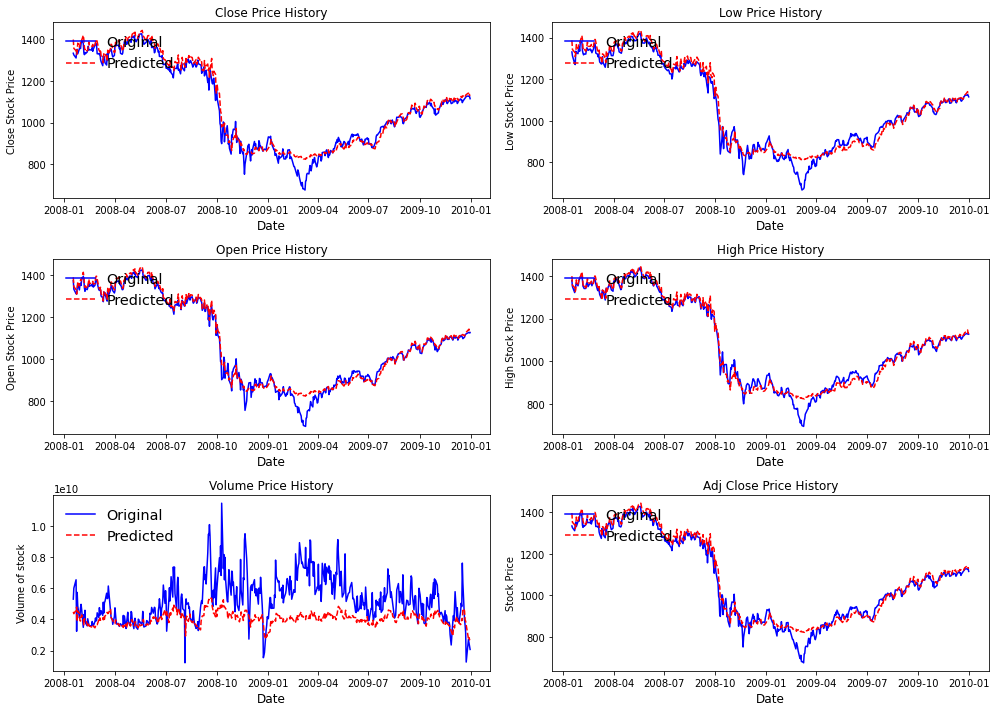

In [170]:
f, (axes) = plt.subplots(3,2, figsize=(14,10))
#=============================================================================================== CLOSE
# First Subplot:"Close Price History"
axes[0,0].plot(sp500_data.index[idxTest:], sp500_data["Close"][idxTest:],color="blue", label ='Original')
axes[0,0].set_xlabel("Date", fontsize=12)
axes[0,0].set_ylabel("Stock Price")
axes[0,0].set_title("Close Price History")

# Second Subplot:"Close Price History"
axes[0,0].plot(df_Result.index, df_Result["Close"], 'r--', label ='Predicted')
axes[0,0].set_xlabel("Date", fontsize=12)
axes[0,0].set_ylabel("Close Stock Price")
axes[0,0].legend(loc='upper left', frameon=False, fontsize='x-large')

#============================================================================================= LOW
# First Subplot:"Low Price History"
axes[0,1].plot(sp500_data.index[idxTest:], sp500_data["Low"][idxTest:],color="blue", label ='Original')
axes[0,1].set_xlabel("Date", fontsize=12)
axes[0,1].set_ylabel("Stock Price")
axes[0,1].set_title("Low Price History")

# Second Subplot:"Close Price History"
axes[0,1].plot(df_Result.index, df_Result["Low"], 'r--', label ='Predicted')
axes[0,1].set_xlabel("Date", fontsize=12)
axes[0,1].set_ylabel("Low Stock Price")
axes[0,1].legend(loc='upper left', frameon=False, fontsize='x-large')

#============================================================================================= OPEN
# First Subplot:"Open Price History"
axes[1,0].plot(sp500_data.index[idxTest:], sp500_data["Open"][idxTest:],color="blue", label ='Original')
axes[1,0].set_xlabel("Date", fontsize=12)
axes[1,0].set_ylabel("Stock Price")
axes[1,0].set_title("Open Price History")

# Second Subplot:"Open Price History"
axes[1,0].plot(df_Result.index, df_Result["Open"], 'r--', label ='Predicted')
axes[1,0].set_xlabel("Date", fontsize=12)
axes[1,0].set_ylabel("Open Stock Price")
axes[1,0].legend(loc='upper left', frameon=False, fontsize='x-large')

#============================================================================================= HIGH
# First Subplot:"High Price History"
axes[1,1].plot(sp500_data.index[idxTest:], sp500_data["High"][idxTest:],color="blue", label ='Original')
axes[1,1].set_xlabel("Date", fontsize=12)
axes[1,1].set_ylabel("Stock Price")
axes[1,1].set_title("High Price History")

# Second Subplot:"High Price History"
axes[1,1].plot(df_Result.index, df_Result["Close"], 'r--', label ='Predicted')
axes[1,1].set_xlabel("Date", fontsize=12)
axes[1,1].set_ylabel("High Stock Price")
axes[1,1].legend(loc='upper left', frameon=False, fontsize='x-large')

#============================================================================================= VOLUME PRICE
# First Subplot:"Volume Price History"
axes[2,0].plot(sp500_data.index[idxTest:], sp500_data["Volume"][idxTest:],color="blue", label ='Original')
axes[2,0].set_xlabel("Date", fontsize=12)
axes[2,0].set_ylabel("Stock Price")
axes[2,0].set_title("Volume Price History")

# Second Subplot:"Volume of stock"
axes[2,0].plot(df_Result.index, df_Result["Volume"], 'r--', label ='Predicted')
axes[2,0].set_xlabel("Date", fontsize=12)
axes[2,0].set_ylabel("Volume of stock")
axes[2,0].legend(loc='upper left', frameon=False, fontsize='x-large')

#============================================================================================== ADJ CLOSE
# First Subplot:"Adj close Price History"
axes[2,1].plot(sp500_data.index[idxTest:], sp500_data["Adj Close"][idxTest:],color="blue", label ='Original')
axes[2,1].set_xlabel("Date", fontsize=12)
axes[2,1].set_ylabel("Stock Price")
axes[2,1].set_title("Adj Close Price History")

# Second Subplot:"Adj Close Price History"
axes[2,1].plot(df_Result.index, df_Result["Adj Close"], 'r--', label ='Predicted')
axes[2,1].set_xlabel("Date", fontsize=12)
axes[2,1].set_ylabel("Stock Price")
axes[2,1].legend(loc='upper left', frameon=False, fontsize='x-large')

plt.tight_layout()
plt.show()

<h3 style=" color : #FF3131">Partie 4 : Prédiction de future </h3>
<p>
Pour prédir les données non connue, nous avons crées la fonction <code>predict_future()</code> qui prend en paramètre : 
<ul>
    <li>le <i> DataFrame</i> de notre données, </li>
    <li><i>pmc</i> notre réseaux multi-couches entrainé</li>
    <li><i>finaldate</i> la dernière date du predictions</li>
    <li><i>l</i> par défaut il vaut 365, signifie la durée en jours qu'on veut prédir, d'autre part, il est un altérnative pour <i>finaldate</i></li>
</ul>
</p>

In [176]:
def predict_future(data,pmc,finaldate=None,l=365):
    """ predict_future ( 
        - data = pandas.DataFrame
        - pmc (perceptron multi couches neural network) , 
        - finaldate = None(Default) (date final de predicition (end date),
        - l=365 (default) nombre de jours de predicition ( alternative pour finaldate) )
    """
    #initialiser les valeurs
    values = data.values
    # n,m sont les dimensions de notre données 
    n,m = values.shape

    #lastdate est notre dérnier date connue (dernier ligne de notre données)
    lastdate = data.index[-1]

    #si l'utilisateur a specifié la date à prédire on utilise la différence en jours entre finaldate et lastdate
    if finaldate:
        days = np.busday_count(lastdate.date() , finaldate.date())
        l = int(days)
        print(l)

    #boucle pour prédir l valeur (chaque date)
    for i in range(l):
        xT = values[n+i-10:n-1+i]
        xT = MinMaxscaler.transform(xT)
        xT = np.reshape(xT,(1,9*m))

        yp = pmc.predict(xT)
        yp = MinMaxscaler.inverse_transform(yp.T)
        values = np.append(values,yp,axis=0)
    
    newvalues = values[n:n+l,:]
    datelist = pd.bdate_range(lastdate, periods=l).tolist()
    datelist = pd.to_datetime(datelist)
    print(datelist.shape)

    newvalues = pd.DataFrame(newvalues, columns=['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'])
    newvalues.index = datelist

    return newvalues

<ul>
    <li>
       On choisir une date à prédire et vérifier la prédiction avec les données originale : 
    </li>
</ul>

In [177]:
d0 = datetime(2010,1,31)

futurevalues = predict_future(data=sp500_data,pmc=pmc,finaldate=d0)

d_start = sp500_data.index[-1]
verify500 = pdr.DataReader('^GSPC', 'yahoo', d_start, d0)

22
(22,)


<ul>
    <li>
       Affichage de graphe : 
    </li>
</ul>

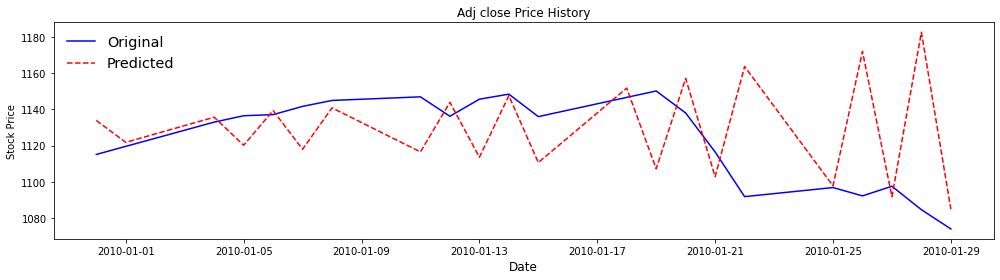

In [179]:
g, axes = plt.subplots(figsize=(14,4))

#-----------------------------------------OriginaL----------------------------------
# First Subplot:"Close Price History"
axes.plot(verify500.index, verify500["Close"], color="blue", label ='Original')
axes.set_xlabel("Date", fontsize=12)
axes.set_ylabel("Stock Price")
axes.set_title("Adj close Price History")

# Second Subplot:"Adj close Price History"
axes.plot(futurevalues.index, futurevalues["Close"],'r--', label ='Predicted')
axes.set_xlabel("Date", fontsize=12)
axes.set_ylabel("Stock Price")
axes.legend(loc='upper left', frameon=False, fontsize='x-large')
plt.tight_layout()
plt.show()

<h3 style=" color : #FF3131">Partie 5 : Conclusion </h3>
<p>
Pour conclure le Réseaux Neuronne Perceptron Multi-Couches, est parmi les outils les plus importants et intéressants dans le monde d'apprentissage automatique, ainsi qu'il nous a aider dans l'apprentissage de plusieurs notions de base concernant les réseaux neuronnes et leur méthode de fonctionnement, et il est utiles dans plusieurs domaine d'applications.
</p>